<a href="https://colab.research.google.com/github/Devanand2401/Movies_rating_dataset/blob/main/Movie_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
#MISSING VALUES
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df["Votes"]=df["Votes"].str.replace(",","")

In [ ]:
df["Votes"]=df["Votes"].str.replace("$5.16M","516",regex=False)

In [ ]:
#CONCAT
Actors=pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']])


In [ ]:
actors=Actors.value_counts().head(10)
actors

Mithun Chakraborty    241
Dharmendra            231
Ashok Kumar           227
Jeetendra             179
Amitabh Bachchan      178
Rekha                 142
Rajesh Khanna         139
Shashi Kapoor         133
Shakti Kapoor         131
Shatrughan Sinha      131
Name: count, dtype: int64

**TOP 10 ACTORS**

Text(0.5, 1.0, 'Top 10 Actors')

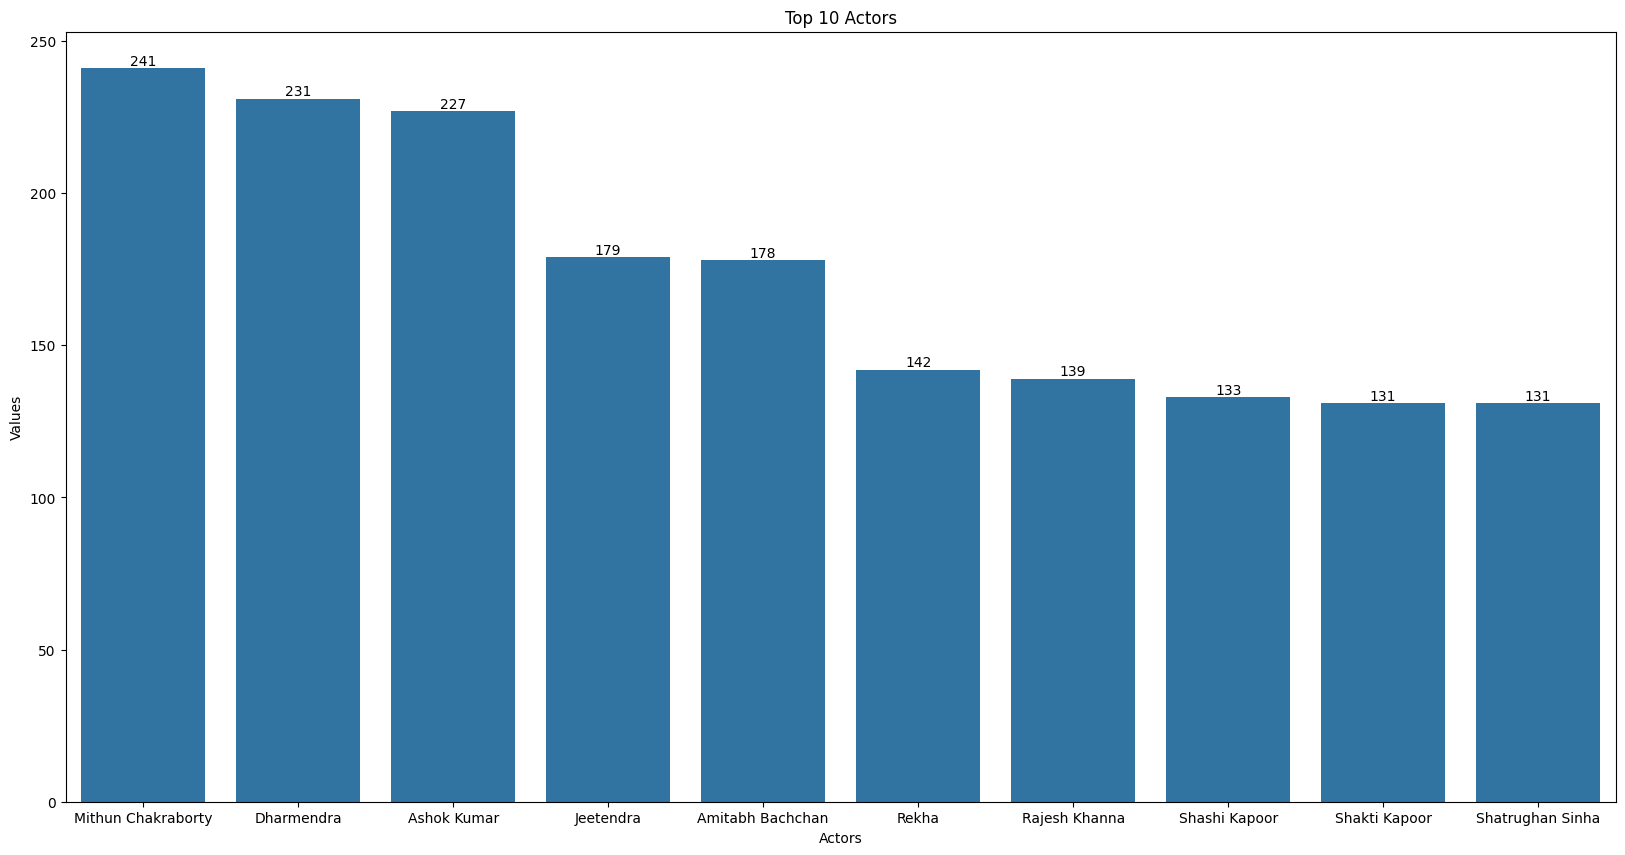

In [ ]:
top10actors=Actors.value_counts().head(10)
plt.figure(figsize=(20,10))
bar=sns.barplot(x=top10actors.index,y=top10actors.values)
bar.bar_label(bar.containers[0])
plt.xlabel('Actors')
plt.ylabel('Values')
plt.title('Top 10 Actors')

**TOP 10 GENRES**

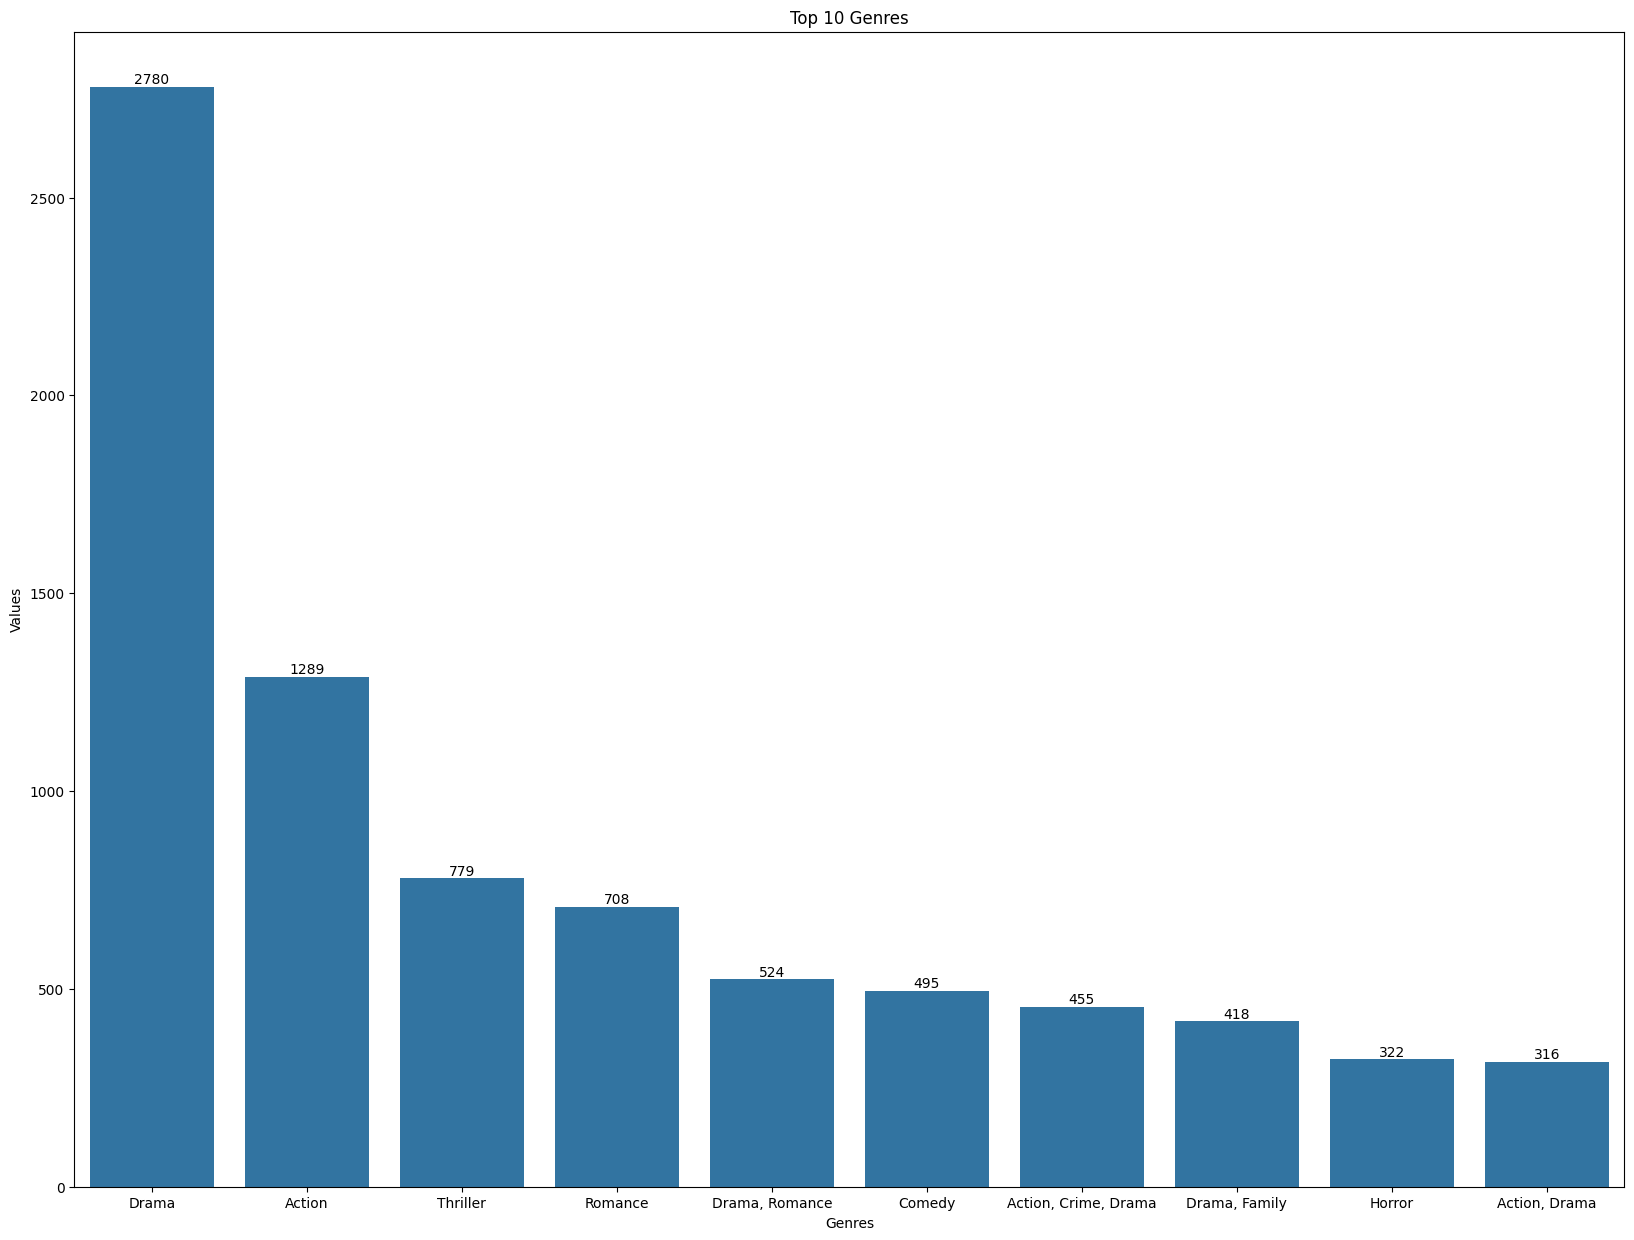

In [ ]:

top10genres=df["Genre"].value_counts().head(10)
plt.figure(figsize=(20,15))
bar=sns.barplot(x=top10genres.index,y=top10genres.values)
bar.bar_label(bar.containers[0])
plt.xlabel("Genres")
plt.ylabel("Values")
plt.title("Top 10 Genres")
plt.show()

**TOP RATED MOVIES**

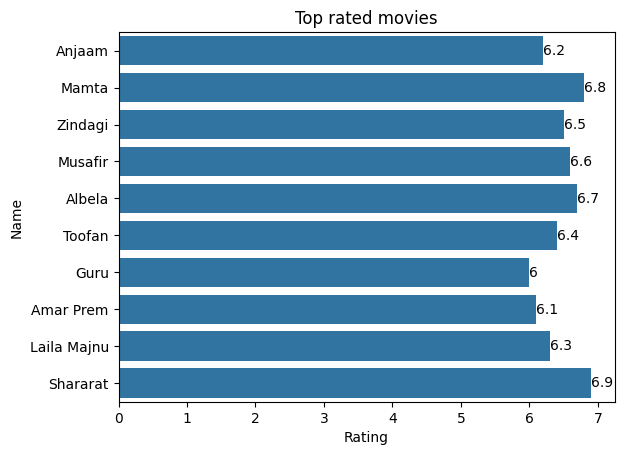

In [ ]:
red=sns.barplot(x=df['Rating'].value_counts().head(10).index,y=df['Name'].value_counts().head(10).index)
red.bar_label(red.containers[0])
plt.xlabel('Rating')
plt.ylabel('Name')
plt.title('Top rated movies')
plt.show()

**FILLING MISSING VALUES**

In [ ]:

a=df['Year'].mode()[0]
df['Year'].fillna(a,inplace=True)
b=df['Duration'].mode()[0]
df['Duration'].fillna(b,inplace=True)
c=df['Genre'].mode()[0]
df['Genre'].fillna(c,inplace=True)
d=df['Rating'].mode()[0]
df['Rating'].fillna(d,inplace=True)
e=df['Votes'].mode()[0]
df['Votes'].fillna(e,inplace=True)
f=df['Director'].mode()[0]
df['Director'].fillna(f,inplace=True)
g=df['Actor 1'].mode()[0]
df['Actor 1'].fillna(g,inplace=True)
g=df['Actor 2'].mode()[0]
df['Actor 2'].fillna(g,inplace=True)
h=df['Actor 3'].mode()[0]
df['Actor 3'].fillna(h,inplace=True)

**FEATURE ENGINEERING**

In [ ]:
features=df.drop("Rating",axis=1)
target=df["Rating"]

In [ ]:
df["Genre"]=df.groupby("Genre")["Rating"].transform("mean")
df["Director"]=df.groupby("Director")["Rating"].transform("mean")
df["Actor 1"]=df.groupby("Actor 1")["Rating"].transform("mean")
df["Actor 2"]=df.groupby("Actor 2")["Rating"].transform("mean")
df["Actor 3"]=df.groupby("Actor 3")["Rating"].transform("mean")
df["Name"]=df.groupby("Name")["Rating"].transform("mean")

In [ ]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.drop(['Year','Duration','Votes'],axis=1,inplace=True)

In [ ]:
x=df.drop('Rating',axis=1)
y=df['Rating']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(pred,y_test)
round(mse,2)
score=r2_score(pred,y_test)
round(score,2)

0.92